# Otatea exploration (TreeSlider for Astral and NANUQ)

With this I want to produce trees for every radloci, in this way I can have trees for Astral and NANUQ.

In [16]:
import toytree
import toyplot.pdf
import pandas as pd
import ipyrad.analysis as ipa
import numpy as np

In [17]:
ipa.__version__

'0.9.84'

In [25]:
assembly = "otatea7_fullOlmeca"

In [26]:
##this hdf5 has strings instead of bytes in the names and produces a error with ipyrad 0.9.81
#in order to solve it I did a copy of the hdf5 file into a new location and change all the strings
#with bytes

SEQS = f"./{assembly}_outfiles/{assembly}.seqs.hdf5"
# SEQS = "./otatea1_outfiles/otatea1.seqs.hdf5"
# SEQS = "./TEST/min_sample_locus02.seqs.hdf5" --> Test worked well, it is something in the otatea data

In [27]:
# #solving bytes problems in hdf5
# # load h5py module
# import h5py
# import numpy as np


# #iterate over all names and change them to bytes
# with h5py.File(SEQS, "a") as io5:
#     names = io5["phymap"].attrs["phynames"]
#     del io5["phymap"].attrs["phynames"]
#     io5["phymap"].attrs["phynames"] = np.asarray([str.encode(i) for i in names], dtype=bytes)

In [28]:
scaff = ipa.treeslider(SEQS)

In [29]:
scaff_table = scaff.scaffold_table.sort_values(by="scaffold_length", ascending=False)
display (scaff_table)

# #use 400 scaffolds ("radloci")
# scaff_toUse = scaff_table.index[:400].tolist()
# print (scaff_toUse)

,scaffold_name,scaffold_length
54,CM029663.1,65826467
56,CM029665.1,64776662
57,CM029666.1,64602909
55,CM029664.1,63230822
32,CM029641.1,62589432
...,...,...
272,JACBGG010000355.1,4338
153,JACBGG010000185.1,4168
177,JACBGG010000086.1,4145
351,JACBGG010000250.1,4127


In [30]:
wex = ipa.window_extracter(data=SEQS)

In [32]:
# create imap with only otatea species and one guadua and one olmeca as outgroup
names = pd.read_csv("nombres_especies_RAD.csv", index_col=0, squeeze=True, usecols=[0,1])
names = names.to_dict() # put them in dict form
names["reference"] = "ref"

imap = {"ingroup": [], "outgroup":[]} 
for n in wex.allnames:
    #include only otateas in ingroup
    if "O." in names[n]:
        imap["ingroup"].append(n)
    #include only MM_A6 (G.longifolia) and MM_C5 (Ol.reflexa) as outgroups. Those were the samples with highest number of reads
    # if "G.longifolia" in names[n] or "Ol.reflexa" in names[n]:
    if "Ol." in names[n]:
        imap["outgroup"].append(n)

print("ingroup:", len(imap["ingroup"]), "outgroup:", len(imap["outgroup"]))
imap

ingroup: 36 outgroup: 5


{'ingroup': ['MM_A1',
  'MM_A2',
  'MM_A3',
  'MM_A4',
  'MM_A5',
  'MM_B1',
  'MM_B2',
  'MM_B3',
  'MM_B4',
  'MM_B5',
  'MM_C1',
  'MM_C2',
  'MM_C3',
  'MM_C4',
  'MM_C8',
  'MM_D1',
  'MM_D2',
  'MM_D3',
  'MM_D4',
  'MM_E1',
  'MM_E2',
  'MM_E3',
  'MM_E4',
  'MM_F1',
  'MM_F2',
  'MM_F3',
  'MM_F4',
  'MM_G1',
  'MM_G2',
  'MM_G3',
  'MM_G4',
  'MM_H1',
  'MM_H2',
  'MM_H3',
  'MM_H4',
  'MM_H7'],
 'outgroup': ['MM_C5', 'MM_D5', 'MM_E5', 'MM_F5', 'MM_G5']}

In [49]:
# define treeslider object and parameters
ts = ipa.treeslider(
    name=assembly,
    data=SEQS, #include sequences
    workdir="analysis-treeslider",
    inference_method="raxml", #use raxml as software for tree individuals tree reconstruction
    inference_args={"N": 100, "T": 2},
    window_size=2000,
    slide_size=2000,
    minsnps=1,
    mincov=0,
    rmincov=0.5,
    consensus_reduce=False,
    # scaffold_idxs=list(scaff.scaffold_table[0:10000].index), #only select the first 10000 loci
    imap=imap,
)

In [50]:
ts.tree_table

,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,2000,0,0,0,0.0,0
1,0,2000,4000,0,0,0,0.0,0
2,0,4000,6000,0,0,0,0.0,0
3,0,6000,8000,0,0,0,0.0,0
4,0,8000,10000,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
1374144,410,54000,56000,0,0,0,0.0,0
1374145,410,56000,58000,0,0,0,0.0,0
1374146,410,58000,60000,0,0,0,0.0,0
1374147,410,60000,62000,0,0,0,0.0,0


In [51]:
# set parallelization parameters
ts.ipcluster['cores'] = 40
ts.ipcluster['threads'] = 2

In [52]:
ts.show_inference_command()

/home/camayal/miniconda3/envs/ipyrad/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 2 -m GTRGAMMA -n ... -w ... -s ... -p 54321 -N 100 -x 12345


In [ ]:
ts.run(auto=True, force=True)

In [ ]:
ts.tree_table

In [ ]:
ts.tree_table[ts.tree_table.tree.notna()]

In [44]:
#reload tablet
import pandas as pd
name = "otatea7_fullOlmeca"
table = pd.read_csv(f"analysis-treeslider/{name}.tree_table.csv", index_col=0)

In [45]:
table.head()

,scaffold,start,end,sites,snps,samples,missing,tree
0,0,0,20000,0,0,0,0.00,NaN
1,0,20000,40000,0,0,0,0.00,NaN
2,0,40000,60000,236,0,41,0.93,NaN
3,0,60000,80000,0,0,0,0.00,NaN
4,0,80000,100000,0,0,0,0.00,NaN


In [46]:
#run astral with only trees that were reconsctructed 
astral = ipa.astral(
    data=table[table.tree.notna()].tree.tolist(),
    # data=table[table.snps > 300].tree.tolist(),
    name=f'astral_{name}',
    workdir='analysis-astral',
    annotation=3
)
astral.run()

[astral.5.7.1.jar]
inferred tree written to (/mnt/data0/camayal/GDRIVE/otherCAML/bambus/analysis-astral/astral_otatea7_fullOlmeca.tre)


In [48]:
import toytree
import pandas

tree = toytree.tree("/mnt/data0/camayal/GDRIVE/otherCAML/bambus/analysis-astral/astral_otatea7_fullOlmeca.tre")

#import real names as dict
names = pandas.read_csv("nombres_especies_RAD.csv", index_col=0, squeeze=True, usecols=[0,1])
names = names.to_dict() # put them in dict form
names["reference"] = "ref"


# new_tips = [f"{names[tip]}_{tip[3:]}" for tip in tree.get_tip_labels()]

# set dict with new tips (real name and code)
new_tips = {tip:f"{names[tip]}_{tip[3:]}" for tip in tree.get_tip_labels()}

# alter the tree itself to mantain new names
tree = tree.set_node_values(feature="name", values=new_tips)

# root tree in Guadua
tree = tree.root(wildcard="Ol.")

# collapse low support
tree = tree.collapse_nodes(min_support=0.5)

# set colors for very bad samples (few reads) AFTER ROOTING
# new_colors = ["red" if tip in [f"{names[i]}_{i[3:]}" for i in bad_samples] else "black" for tip in tree.get_tip_labels()]

c,a,m = tree.draw(width=1000, 
                  node_labels=tree.get_node_values("support"), 
                  node_sizes=15,
                  # tip_labels_colors=new_colors
                 )

<svg class="toyplot-canvas-Canvas" height="738.0px" id="tf1d7d4be45f1425da645daee4ebe3aa3" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 1000.0 738.0" width="1000.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.92 0.54 0.57 0.61 0.85 0.58 0.67 0.69 0.77 0.66 0.66 0.5 0.51 O.nayeeri_E4 O.carrilloi_F4 O.acuminata_CG_Jal_G1 O.acuminata_Ver1_A1 O.ramirezii_C8 O.acuminata_Mich_Luz_C2 O.acuminata_Mich_A2 O.acuminata_Oax_H7 O.acuminata_SG_Jal1_H2 O.acuminata_SG_Jal2_A3 O.nayeeri_478_A5 O.acuminata_Ags2_E2 O.acuminata_Ags1_D2 O.acuminata_Zac2_G2 O.acuminata_Zac1_F2 O.acuminata_Seb_Jal_B3 O.acuminata_Gro_B2 O.acuminata_Ver2_B1 O.victoriae_Mich2_D4 O.victoriae_Mich1_C4 O.reynosoana_H4 O.acuminata_PV_Jal_C3 O.acuminata_Teq_Jal_E1 O. odam_D3 O.acuminata_Colima_F1 O.fimbriata_F3 O.rezdowskiourm_E3 O.transvolcanica_B5 O.victoriae2_B4 O.victoriae1_A4 O.acuminata_Oax1_C1 O.acuminata_Oax2_D1 O.ximenae_Oax2_H3 O.glauca_G4 O.ximenae_Oax1_G3 O.acuminata_SLP_H1 Ol.clarkiae_D5 Ol.fulgor_G5 Ol.reflexa_C5 Ol.zapoptecorum_F5 Ol.recta_E5

## Distribution of loci in Otatea1

This run has been difficult because apparently, none of the radloci is shared by all samples in the assembly. I am here doublechecking it by counting the number of samples per loci in the loci file.


In [ ]:
with open("./otatea1_outfiles/otatea1.loci", "r") as file:
    lines = file.readlines()
    freqs = []
    count = 0
    for line in lines:
        if line.startswith("//"):
            #get final count of a given loci
            freqs.append(count)
            count = 0
        else:
            #add counter
            count += 1

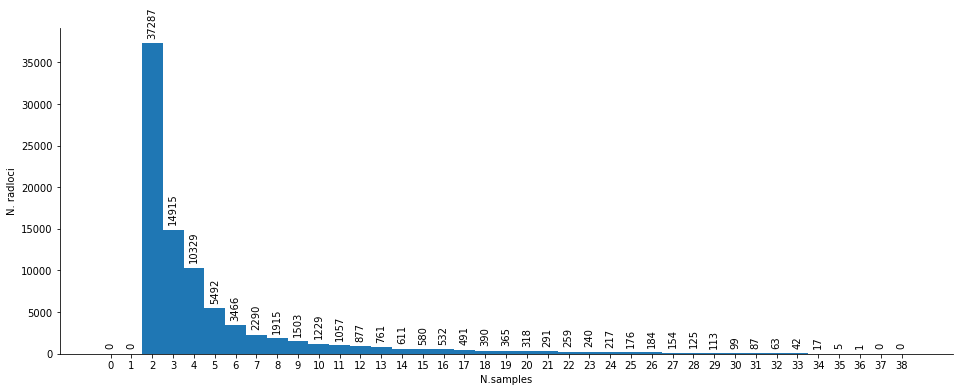

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(freqs, density=False, bins=np.arange(40)-0.5)



for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', rotation=90) 


ax.set_xticks(range(39))

ax.set_xlabel("N.samples")
ax.set_ylabel("N. radloci")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.tight_layout()
plt.show()


## Distribution of loci in Otatea7

Here can see that at least 31 loci are shared with all samples


In [72]:
with open("./otatea7_outfiles/otatea7.loci", "r") as file:
    lines = file.readlines()
    freqs = []
    count = 0
    for line in lines:
        if line.startswith("//"):
            #get final count of a given loci
            freqs.append(count)
            count = 0
        else:
            #add counter
            count += 1

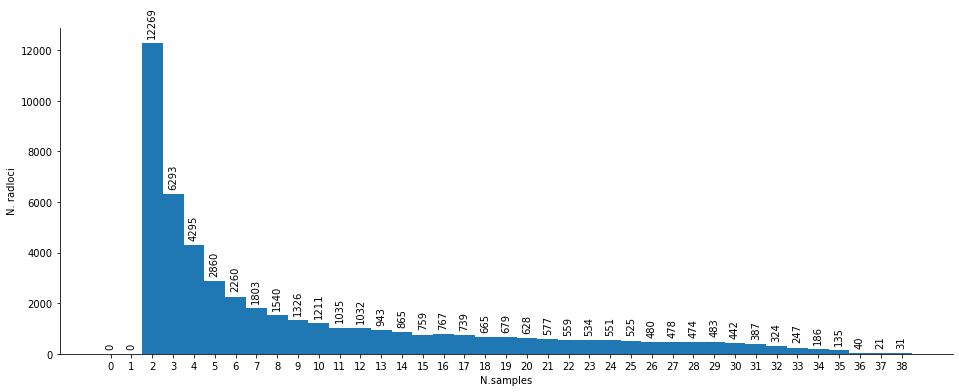

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(freqs, density=False, bins=np.arange(40)-0.5)



for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', rotation=90) 


ax.set_xticks(range(39))

ax.set_xlabel("N.samples")
ax.set_ylabel("N. radloci")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.tight_layout()
plt.show()
